**Python Paketleri**  
**Özet:** Bu öğreticide, Python paketlerini ve bunları uygulamanızı yapılandırmak için nasıl kullanacağınızı öğreneceksiniz.  

**Python Paketlerine Giriş**  
Diyelim ki, siparişten ödemeye kadar olan satış sürecini yöneten büyük bir uygulama geliştirmeniz gerekiyor.  

Uygulama birden çok modül içerecek. Modül sayısı arttıkça, tüm bu modülleri tek bir yerde tutmak zorlaşacaktır.  

Ve modülleri anlamlı bir şekilde gruplamak isteyebilirsiniz.  

İşte burada paketler devreye girer.  

Paketler, modülleri hiyerarşik bir yapıda düzenlemenizi sağlar.  

Python, paketler ve modülleri, işletim sistemlerinin klasörleri ve dosyaları düzenleme şekline benzer şekilde organize eder.  

Bir paket oluşturmak için yeni bir klasör oluşturur ve ilgili modülleri bu klasöre yerleştirirsiniz.  

Python'a, dosyalar içeren bir klasörü paket olarak kabul etmesi talimatını vermek için, klasörde bir `__init__.py` dosyası oluşturmanız gerekir.  

Python 3.3 ile birlikte, Python, `__init__.py` olmadan da bir klasörü paket olarak kabul etme özelliğini tanıttı.  

Örneğin, aşağıdaki resim, sipariş, teslimat ve faturalama dahil üç modül içeren bir satış paketini göstermektedir:  

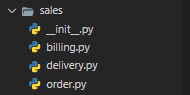

In [1]:
from IPython.display import Image

# Aynı dizindeki bir resmi görüntüleme
Image(filename="Python-Packages.png")

**Paket İçe Aktarma**  
Bir paketi içe aktarmak için şu şekilde `import` ifadesini kullanırsınız:

```python
import package.module
```

Bir pakete ait modülden bir nesneye erişmek için nokta notasyonunu kullanırsınız:

```python
package.module.function
```

Aşağıda, satış paketinden sipariş, teslimat ve faturalama modüllerindeki fonksiyonların nasıl kullanılacağını gösteren bir örnek bulunmaktadır:

```python
# main.py
import sales.order
import sales.delivery
import sales.billing

sales.order.create_sales_order()
sales.delivery.create_delivery()
sales.billing.create_billing()
```

Kodu daha kısa hale getirmek için bir modülden bir fonksiyonu içe aktarmak için şu ifadeyi kullanabilirsiniz:

```python
from <module> import <function>
```

Örneğin:

```python
# main.py
from sales.order import create_sales_order
from sales.delivery import create_delivery
from sales.billing import create_billing

create_sales_order()
create_delivery()
create_billing()
```

Bir nesneyi içe aktarırken yeniden adlandırmak mümkündür:

```python
# main.py
from sales.order import create_sales_order as create_order
from sales.delivery import create_delivery as start_delivery
from sales.billing import create_billing as issue_billing

create_order()
start_delivery()
issue_billing()
```

Bu örnekte, şunları yeniden adlandırıyoruz:

- `create_sales_order`'ı `create_order` olarak,
- `create_delivery`'yi `start_delivery` olarak,
- ve `create_billing`'i `issue_billing` olarak.

**Paket Başlatma**  
Geleneksel olarak, bir paketi içe aktardığınızda, Python o paketteki `__init__.py` dosyasını çalıştırır.  

Bu nedenle, paket seviyesindeki verileri başlatmak için kodu `__init__.py` dosyasına yerleştirebilirsiniz.  

Aşağıdaki örnek, satış paketinin `__init__.py` dosyasına varsayılan vergi oranını tanımlar:

```python
# __init__.py

# varsayılan satış vergi oranı
TAX_RATE = 0.07
```

`main.py` dosyasından, satış paketindeki `TAX_RATE`'i şu şekilde erişebilirsiniz:

```python
# main.py
from sales import TAX_RATE

print(TAX_RATE)
```

Paket seviyesindeki verileri başlatmanın yanı sıra, `__init__.py` dosyası, paketten modüllerin otomatik olarak içe aktarılmasına da olanak tanır.  

Örneğin, `__init__.py` dosyasına şu ifadeyi yerleştirirseniz:

```python
# __init__.py

# sipariş modülünü otomatik olarak içe aktar
from sales.order import create_sales_order

# varsayılan satış vergi oranı
TAX_RATE = 0.07
```

Ve `main.py` dosyasından satış paketini içe aktarır ve `create_sales_order` fonksiyonu otomatik olarak şu şekilde kullanılabilir hale gelir:

```python
# main.py
import sales

sales.order.create_sales_order()
```

**from <package> import * İfadesi**  
Bir paketten tüm nesneleri içe aktarmak için şu ifadeyi kullanırsınız:

```python
from <package> import *
```

Python, `__init__.py` dosyasını arayacaktır.  

Eğer `__init__.py` dosyası varsa, dosyadaki özel bir listede (`__all__`) belirtilen tüm modülleri yükler.  

Örneğin, sipariş ve teslimat modüllerini `__all__` listesine şu şekilde yerleştirebilirsiniz:

```python
# __init__.py

__all__ = [
    'order',
    'delivery'
]
```

Ve `main.py` dosyasında şu içe aktarma ifadesini kullanabilirsiniz:

```python
# main.py
from sales import *

order.create_sales_order()
delivery.create_delivery()

# faturalama modülüne erişilemez
```

`main.py` dosyasından, sipariş ve teslimat modüllerinde tanımlanan fonksiyonlara erişebilirsiniz. Ancak, faturalama modülüne erişemezsiniz çünkü o `__all__` listesinde yer almıyor.

**Alt Paketler**  
Paketler, alt paketler içerebilir. Alt paketler, modülleri daha ayrıntılı bir şekilde düzenlemenize olanak tanır.  

Aşağıda, sipariş, teslimat ve faturalama olmak üzere üç alt paket içeren bir satış paketini gösteren bir örnek bulunmaktadır. Her alt paket, ilgili modülü içerir.  

Örneğin, sipariş işleme ile ilgili diğer tüm modülleri `order` alt paketinde toplayabilirsiniz:  

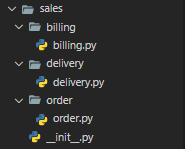

In [2]:
from IPython.display import Image

# Aynı dizindeki bir resmi görüntüleme
Image(filename="Python-Subpackages.png")

Paketler hakkında öğrendikleriniz, alt paketler için de geçerlidir.  

Örneğin, `order` alt paketinden bir fonksiyon içe aktarmak için aşağıdaki içe aktarma ifadesini kullanırsınız:

```python
# main.py
from sales.order import create_sales_order

create_sales_order()
```

**Özet**  
Bir Python paketi, bir veya birden fazla modül içerir. Python, paketleri ve modülleri yönetmek için klasörler ve dosya yapısını kullanır.  
Paket seviyesindeki verileri başlatmak isterseniz, `__init__.py` dosyasını kullanın.  
Paket içe aktarılırken otomatik olarak yüklenecek modülleri belirtmek için `__all__` değişkenini kullanın.  
Bir paket, alt paketler içerebilir.